## PCA(Principal Component Analysis)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### Iris data

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
# 표준 스케일러로 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

### 1) Numpy로 구하기

In [7]:
# 공분산행렬 구하기
iris_cov = np.dot(iris_std.T, iris_std) / len(iris_std)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [8]:
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [9]:
# 표본집단에 대한 공분산
iris_cov = np.dot(iris_std.T, iris_std) / (len(iris_std)-1)
iris_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [10]:
# 고유벡터, 고유값 구하기
eig_vals, eig_vecs = np.linalg.eig(iris_cov)
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [11]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [12]:
eig_vecs.T

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [13]:
# 주성분 PC1
PC1 = np.dot(iris_std, eig_vecs.T[0].reshape(-1,1))
PC1[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [14]:
iris_std[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [15]:
# 주성분 PC2
PC2 = np.dot(iris_std, eig_vecs.T[1].reshape(-1,1))
PC2[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [17]:
iris_PCA = pd.DataFrame(
    {'PC1':PC1.reshape(-1,), 'PC2':PC2.reshape(-1,), 'species':iris.target}
)
iris_PCA.head()

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


### 2) 싸이킷 런으로 구하기

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [19]:
iris_pca = pca.fit_transform(iris_std)
iris_pca.shape

(150, 2)

In [20]:
iris_pca[:5,:]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [21]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [22]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [23]:
eig_vals[0]/np.sum(eig_vals), eig_vals[1]/np.sum(eig_vals)

(0.7296244541329984, 0.22850761786701795)

### 데이터 시각화

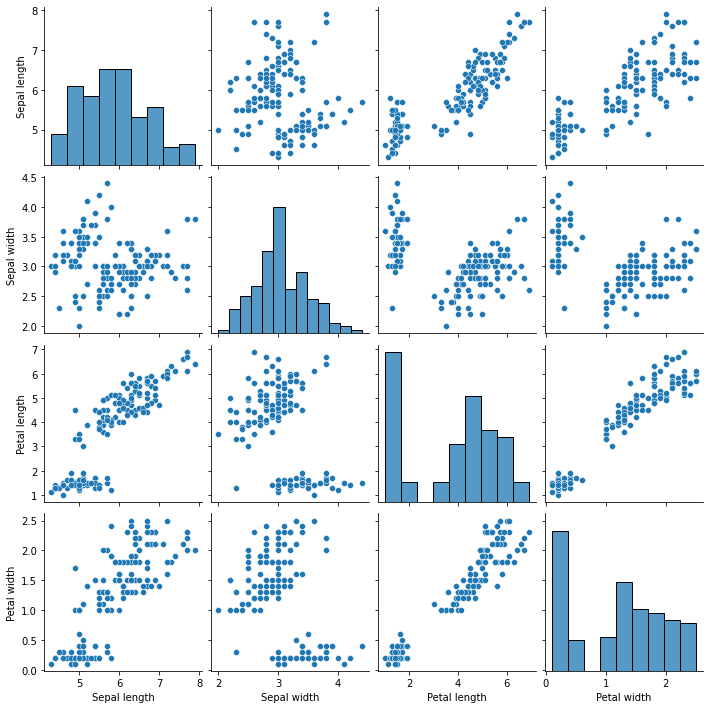

In [25]:
feature_names = ['Sepal length','Sepal width','Petal length','Petal width']
iris_df = pd.DataFrame(iris.data, columns=feature_names)
sns.pairplot(iris_df)

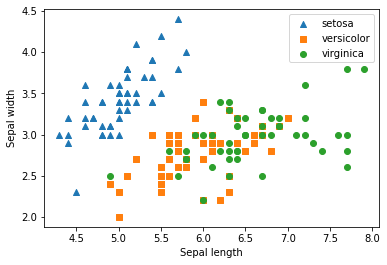

In [26]:
iris_df['species'] = iris.target
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_data = iris_df[iris_df['species']==i]['Sepal length']
    y_data = iris_df[iris_df['species']==i]['Sepal width']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### PCA 변환후 시각화

In [28]:
iris_pca_df = pd.DataFrame(iris_pca, columns=['PC1','PC2'])
iris_pca_df['species'] = iris.target
iris_pca_df.head()

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


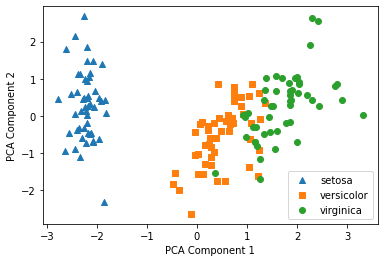

In [29]:
for i, marker in enumerate(markers):
    x_data = iris_pca_df[iris_pca_df['species']==i]['PC1']
    y_data = iris_pca_df[iris_pca_df['species']==i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 분류 비교

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### 1) 차원 축소하기 전 데이터로 분류

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.3, random_state=2021
)

In [34]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9111111111111111

### 2) 차원축소 후 데이터로 분류

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca, iris.target, stratify=iris.target, test_size=0.3, random_state=2021
)

In [37]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9111111111111111